In [1]:
library(ggplot2)
library(dplyr)

setwd("/content/drive/MyDrive/AAFT_Draft/Data")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [23]:
# get descriptives
cgl_totl <- read.csv("survey/cgl_total.csv")
cgl_actv <- read.csv("survey/cgl_active.csv")

In [24]:
names(cgl_totl)

[1] "X"          "user_id"    "gender"     "age"        "height"    
 [6] "income"     "edu"        "loc"        "house"      "marr"      
[11] "status"     "intro"      "exp"        "car"        "parents"   
[16] "sibling"    "job_role"   "out"        "cert"       "par_marr"  
[21] "par_age"    "par_height" "par_edu"    "par_income" "par_loc"   
[26] "reg"        "log"        "quarter"    "compensate" "age_adj"

In [25]:
summary_totl <- cgl_totl %>%
  group_by(gender) %>%
  summarise(
    count = n(),
    mean_age = mean(age_adj, na.rm = T),
    sd_age = sd(age_adj, na.rm = T),
    mean_h = mean(height, na.rm = T),
    sd_h = sd(height, na.rm = T)
    ) %>%
  mutate(p = (count/sum(count)) * 100)

summary_actv <- cgl_actv %>%
  group_by(gender) %>%
  summarise(
    count = n(),
    mean_age = mean(age_adj, na.rm = T),
    sd_age = sd(age_adj, na.rm = T),
    mean_h = mean(height, na.rm = T),
    sd_h = sd(height, na.rm = T)
    ) %>%
  mutate(p = (count/sum(count)) * 100)

In [27]:
summary_totl

summary_actv

gender,count,mean_age,sd_age,mean_h,sd_h,p
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,24774,28.27219,4.646567,162.7771,5.063464,27.93325
male,63916,29.84054,5.109648,174.3351,5.080418,72.06675


gender,count,mean_age,sd_age,mean_h,sd_h,p
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
female,906,33.15866,4.400435,162.8962,7.711386,18.69197
male,3941,34.31674,4.643243,175.0112,5.044661,81.30803


In [ ]:
dat <- read.csv("web2/web2_cleaned.csv")

In [ ]:
# make factors
dat$income <- factor(dat$income, levels = c("below 2k", "2k - 3k", "3k - 5k", "5k - 8k", "8k - 12k",
                    "12k - 20k", "above 20k", "20k - 50k", "50k - 100k", "100k - 200k", "above 200k"))

dat$house <- factor(dat$house, levels = c('no house','no house, partner provide', 'no house, both provide',
                    'company house', 'with parents','with relatives',
                    'shared rent', 'renting alone', 'can buy', 'own with loan',
                    'own no loan'))

dat$job_role <- factor(dat$job_role, levels = c('Media/Publishing', 'Tourism', 'Hospitality', 'Advertising/PR', 'Government',
                    'Education/Training', 'Healthcare', 'Furniture/Toys', 'Real Estate', 'Legal',
                    'Finance/Investment', 'Transportation', 'Academia/Research', 'IT/Internet',
                    'Manufacturing/Energy', 'Apparel/Textiles', 'Trade', 'Agriculture', 'Telecom/Electronics',
                    'Entertainment/Sports', 'Financial Services', 'Arts/Music', 'Consulting/HR', 'Non-Profit',
                    'Interior Design', 'Automotive', 'Consumer Goods', 'Beauty/Health', 'Office Supplies',
                    'Other Industries'))

dat$edu <- factor(dat$edu, levels = c("middle school", "high school associate",
                 "high school", "college associate", "college", "master", "doctrate"))

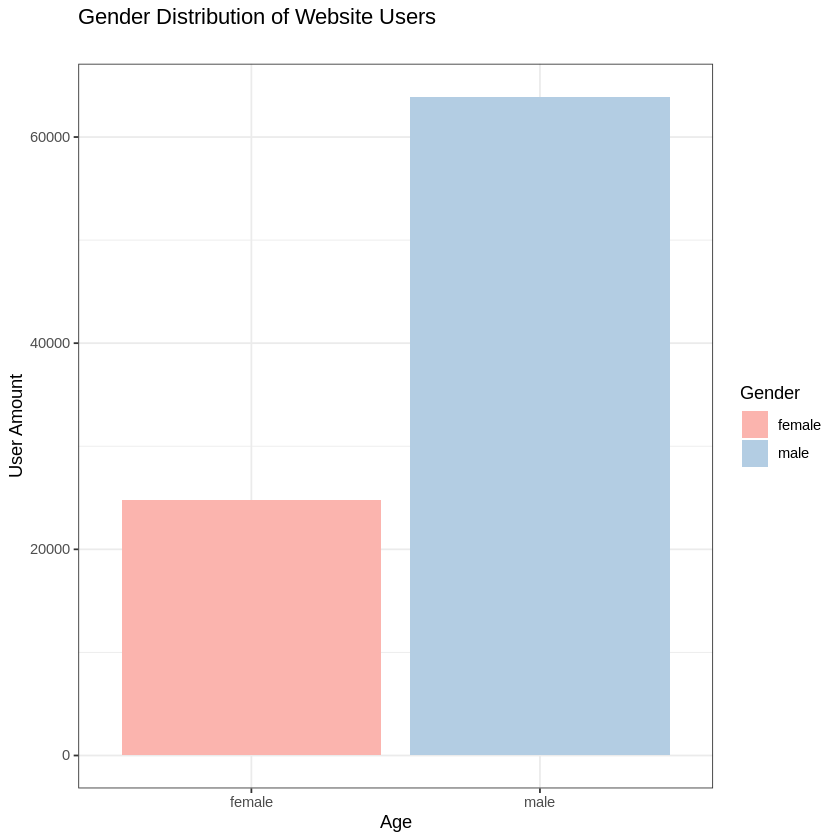

In [ ]:
# gender dif
ggplot(dat, aes(x = gender, fill = gender)) +
  geom_bar() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Gender Distribution of Website Users",
        subtitle = "",
        x = "Age",
        y = "User Amount",
        fill = "Gender") +
  theme_bw()

In [ ]:
# under 17
# 18-24
# 25-34
# 35-44
# 44-54
# 55 and above

`summarise()` has grouped output by 'age_group'. You can override using the
`.groups` argument.


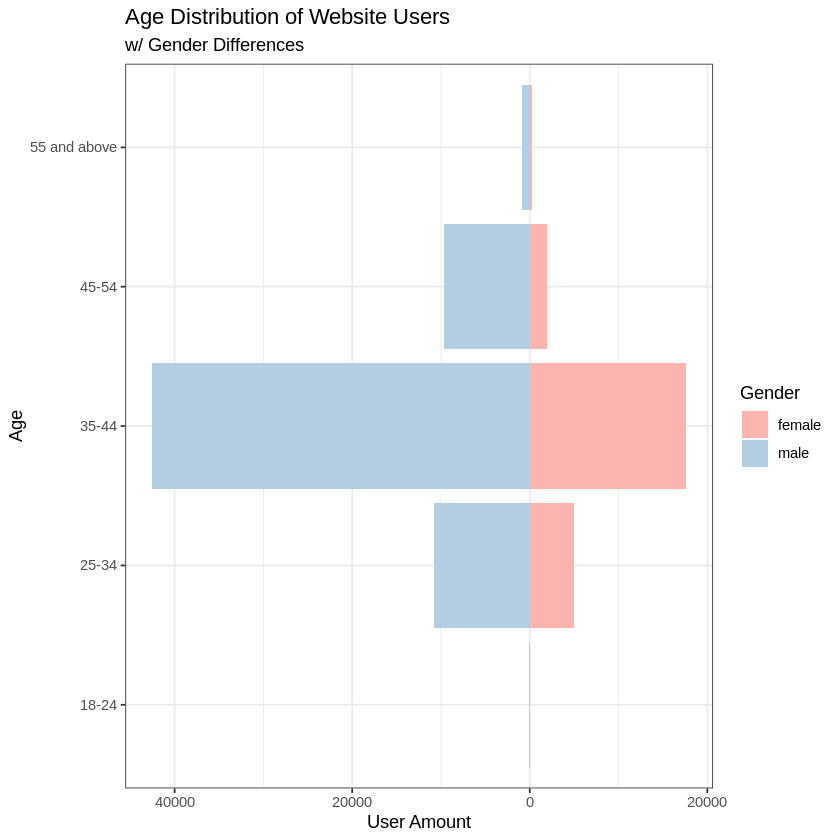

In [ ]:
# age distribution
dat$age_group <- cut(dat$age,
                     breaks = c(-Inf, 17, 24, 34, 44, 54, Inf),
                     labels = c("Under 17", "18-24", "25-34", "35-44", "45-54", "55 and above"))

tmpdat <- dat %>%
  group_by(age_group, gender) %>%
  summarize(ppln = n()) %>%
  mutate(ppln = ifelse(gender == "male", -ppln, ppln))



ggplot(tmpdat, aes(x = age_group, y = ppln, fill = gender)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = abs) +
  coord_flip() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Age Distribution of Website Users",
        subtitle = "w/ Gender Differences",
        x = "Age",
        y = "User Amount",
        fill = "Gender") +
  theme_bw()

`summarise()` has grouped output by 'edu'. You can override using the `.groups`
argument.


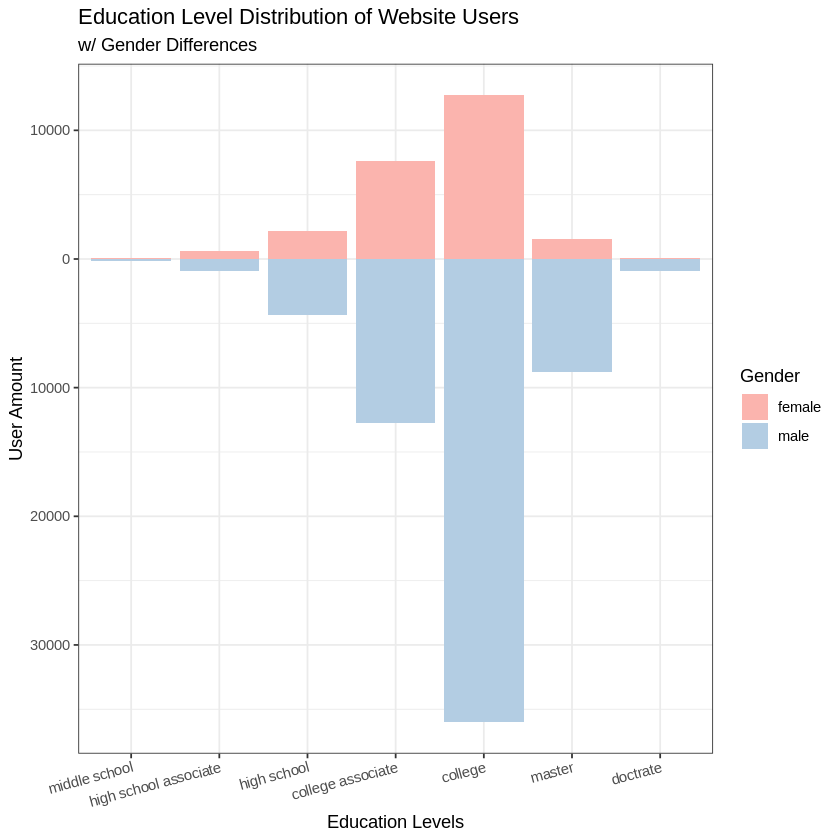

In [ ]:
# education distribution
tmpdat <- dat %>%
  group_by(edu, gender) %>%
  summarize(ppln = n()) %>%
  mutate(ppln = ifelse(gender == "male", -ppln, ppln)) %>%
  ungroup()

ggplot(tmpdat, aes(x = edu, y = ppln, fill = gender)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = abs) +
  #coord_flip() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Education Level Distribution of Website Users",
        subtitle = "w/ Gender Differences",
        x = "Education Levels",
        y = "User Amount",
        fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 15, hjust = 1, vjust = 1))

`summarise()` has grouped output by 'income'. You can override using the
`.groups` argument.


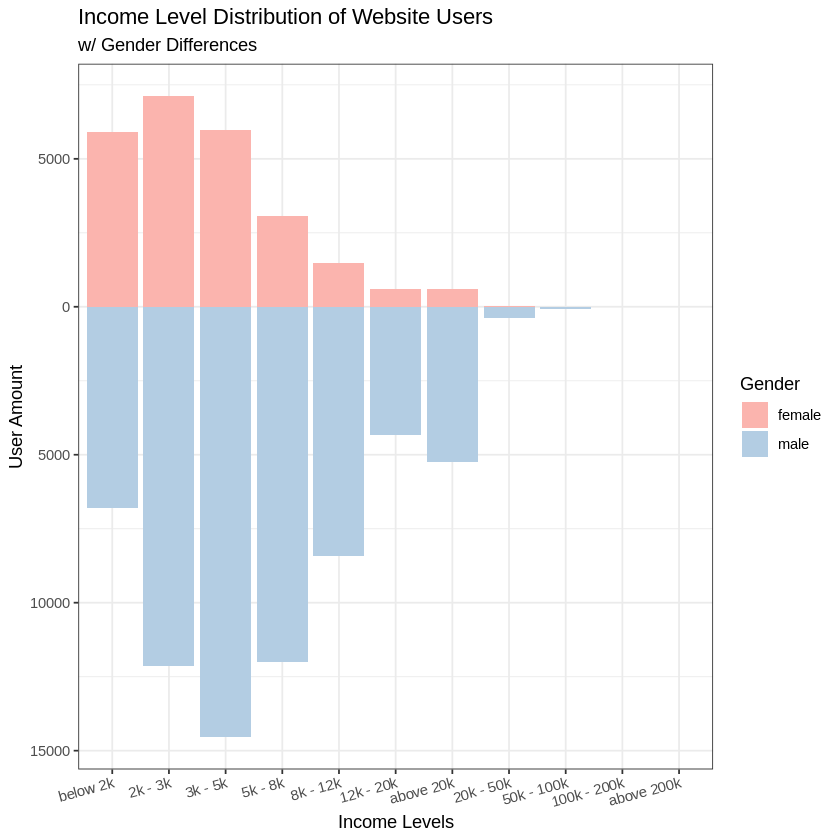

In [ ]:
# income distribution
tmpdat <- dat %>%
  group_by(income, gender) %>%
  summarize(ppln = n()) %>%
  mutate(ppln = ifelse(gender == "male", -ppln, ppln)) %>%
  ungroup()

ggplot(tmpdat, aes(x = income, y = ppln, fill = gender)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = abs) +
  #coord_flip() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Income Level Distribution of Website Users",
        subtitle = "w/ Gender Differences",
        x = "Income Levels",
        y = "User Amount",
        fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 15, hjust = 1, vjust = 1))

`summarise()` has grouped output by 'house'. You can override using the
`.groups` argument.


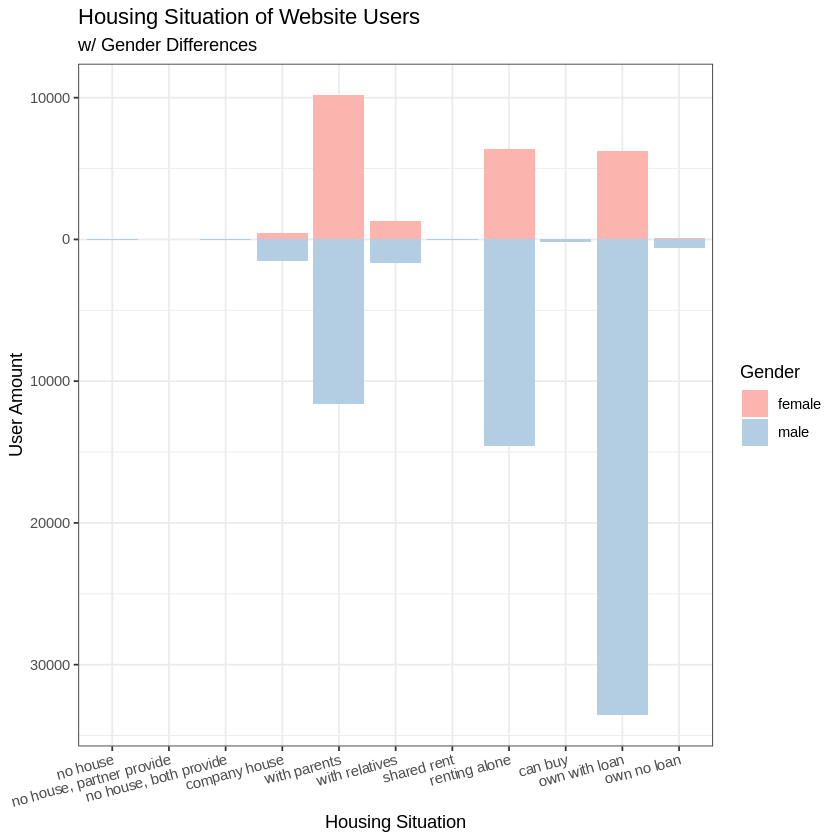

In [ ]:
# housing situation distribution
tmpdat <- dat %>%
  group_by(house, gender) %>%
  summarize(ppln = n()) %>%
  mutate(ppln = ifelse(gender == "male", -ppln, ppln)) %>%
  ungroup()

ggplot(tmpdat %>% filter(!is.na(house)), aes(x = house, y = ppln, fill = gender)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = abs) +
  #coord_flip() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Housing Situation of Website Users",
        subtitle = "w/ Gender Differences",
        x = "Housing Situation",
        y = "User Amount",
        fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 15, hjust = 1, vjust = 1))

`summarise()` has grouped output by 'job_role'. You can override using the
`.groups` argument.


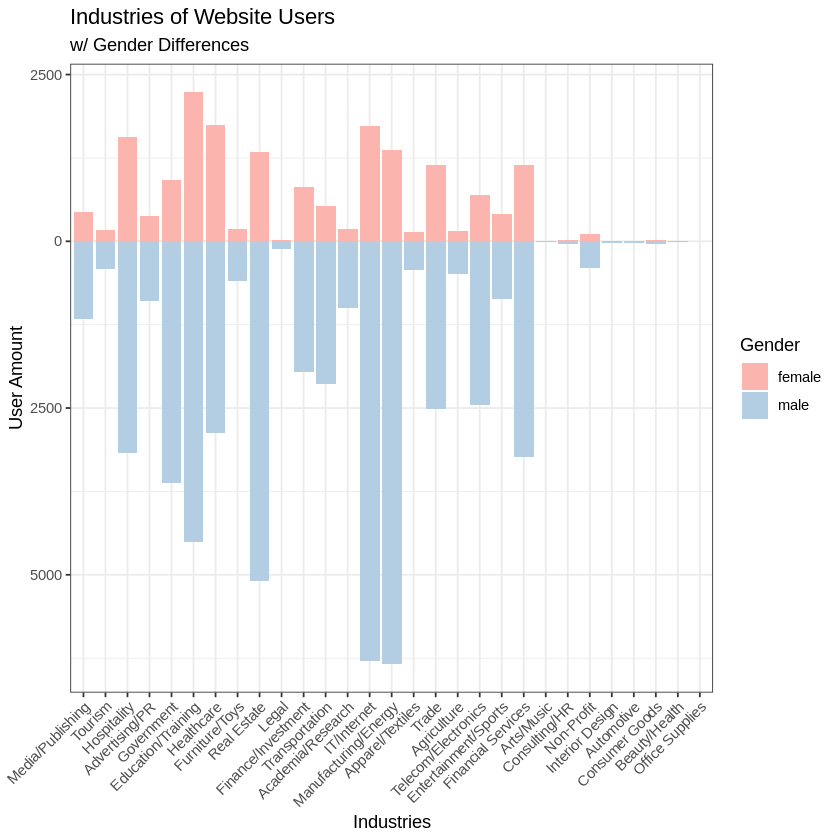

In [ ]:
# industry distribution distribution
tmpdat <- dat %>%
  group_by(job_role, gender) %>%
  subset(!job_role == 'Other Industries') %>% # too many other industry people
  summarize(ppln = n()) %>%
  mutate(ppln = ifelse(gender == "male", -ppln, ppln)) %>%
  ungroup()

ggplot(tmpdat, aes(x = job_role, y = ppln, fill = gender)) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = abs) +
  #coord_flip() +
  scale_fill_brewer(palette = "Pastel1") +
  labs(title = "Industries of Website Users",
        subtitle = "w/ Gender Differences",
        x = "Industries",
        y = "User Amount",
        fill = "Gender") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

In [ ]:
# !!! choose data set is important at this point !!!

# choose unfiltered data w/ entire population of 350k

setwd("/content/drive/MyDrive/AAFT_Draft/Data")
dat <- read.csv("web2/combined_users_data.csv")
time <- read.csv("web2/user_registration_and_login_data.csv") #time stamps

dat <- dat %>%
  merge(., time, by = "user_id", all = TRUE) %>%
  rename("reg" = "registration_time") %>%
  rename("log" = "last_login_time") %>%
  #select(reg, log) %>%
  filter(!is.na(reg)) %>%
  filter(!is.na(log))

dat$reg <- as.Date(dat$reg)
dat$log <- as.Date(dat$log)

In [ ]:
# 178k users were registed & deleted on 2004/12/31 therefore all removed from dataset
# similarly, 720 was registed on 2021/10/1 exceeding 2nd most date (197)

regFake <- dat %>%
  group_by(reg) %>%
  summarize(users = n())

logFake <- dat %>%
  group_by(log) %>%
  summarize(users = n())

#regFake %>%
#  arrange(desc(users))
#logFake %>%
#  arrange(desc(users))

In [ ]:
# deleting some of the useless data
dat <- dat %>%
  subset(!reg == as.Date('2004-12-31')) %>%
  subset(!reg == as.Date('2021-10-1'))

`summarise()` has grouped output by 'reg'. You can override using the `.groups`
argument.
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


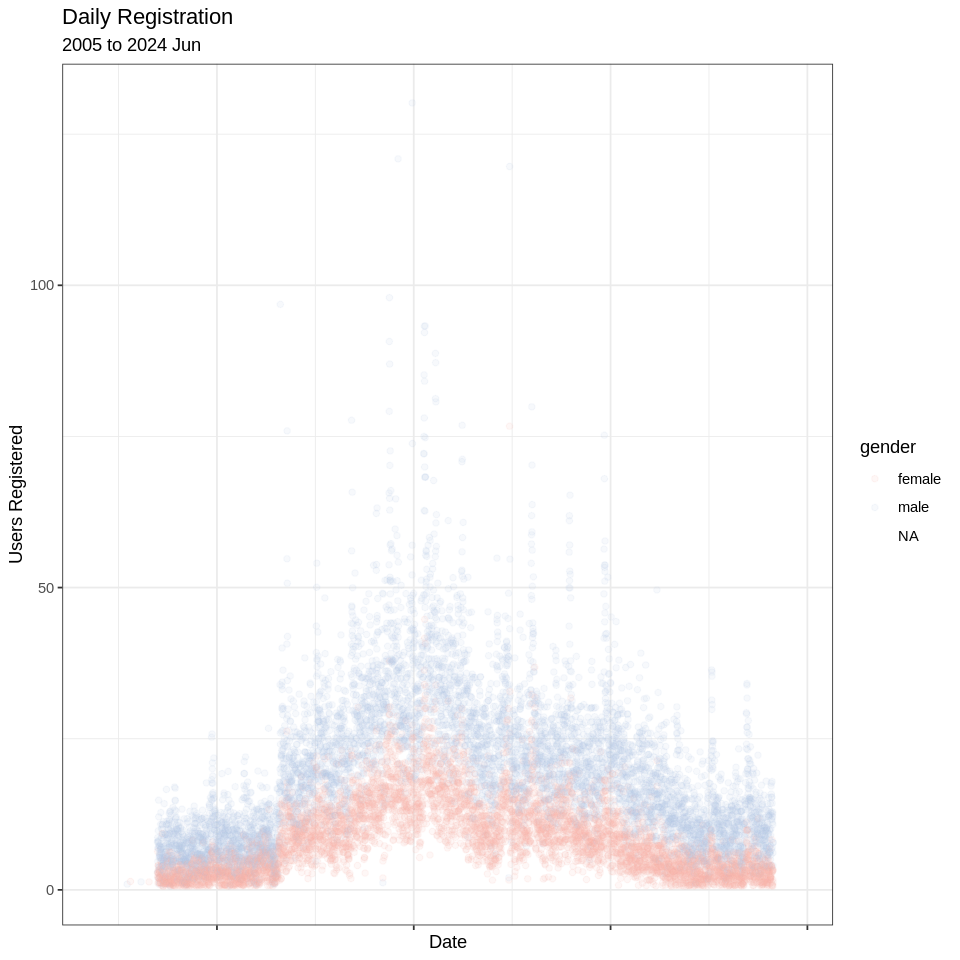

In [ ]:
# plot user changes

tmpreg <- dat %>%
  group_by(reg, gender) %>%
  summarize(users = n())

ggplot(tmpreg, aes(reg, users)) +
  geom_jitter(alpha = 1/10, aes(color = gender)) +
  scale_x_continuous(limits = c(as.Date("2005-01-01"), as.Date("2024-07-01"))) +
  labs(title = "Daily Registration",
        subtitle = "2005 to 2024 Jun",
        x = "Date",
        y = "Users Registered") +
  scale_color_brewer(palette = "Pastel1") +
  theme_bw() +
  theme(axis.text.x = element_blank())

`summarise()` has grouped output by 'log'. You can override using the `.groups`
argument.
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


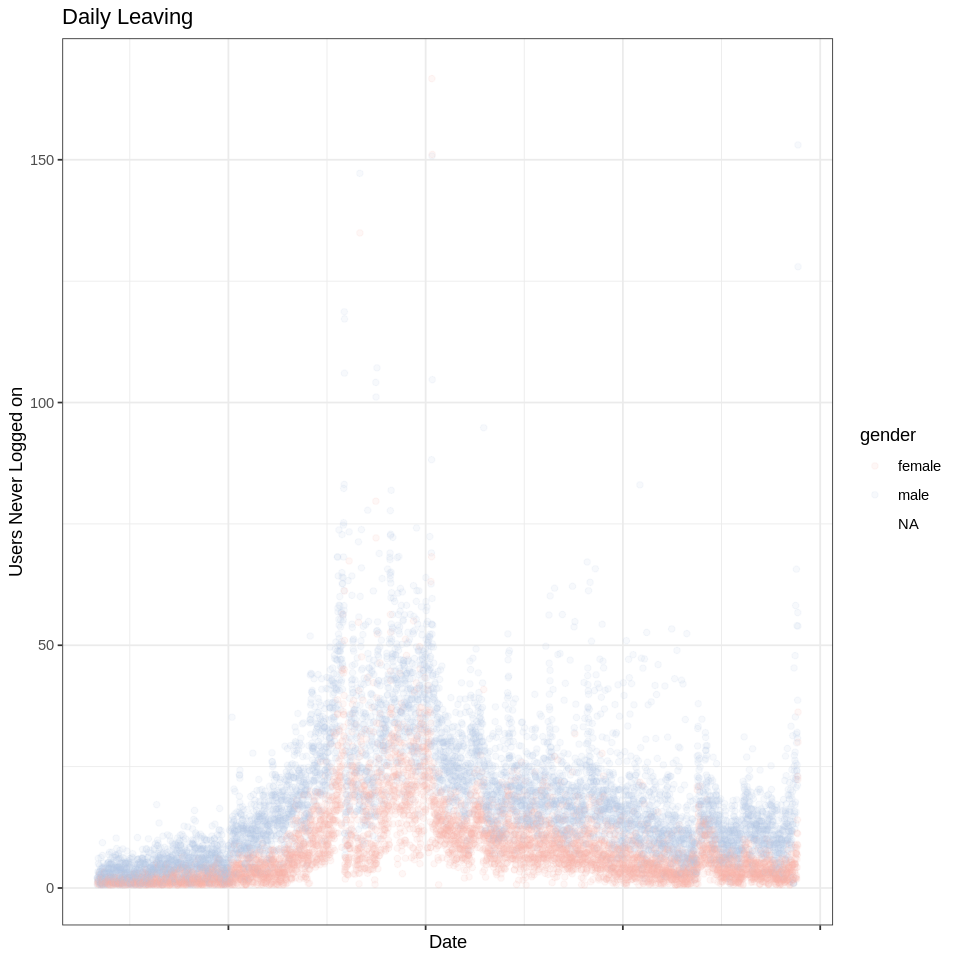

In [ ]:
# plot user leaving
# last time log in (lost activity of user)

tmplog <- dat %>%
  group_by(log, gender) %>%
  summarize(users = n())

ggplot(tmplog %>% subset(log < as.Date("2024-6-11")), aes(log, users)) +
  geom_jitter(alpha = 1/10, aes(color = gender)) +
  labs(title = "Daily Leaving",
        x = "Date",
        y = "Users Never Logged on") +
  scale_color_brewer(palette = "Pastel1") +
  theme_bw() +
  theme(axis.text.x = element_blank())

In [ ]:
options(repr.plot.width = 8, repr.plot.height =8)

`geom_smooth()` using formula = 'y ~ x'


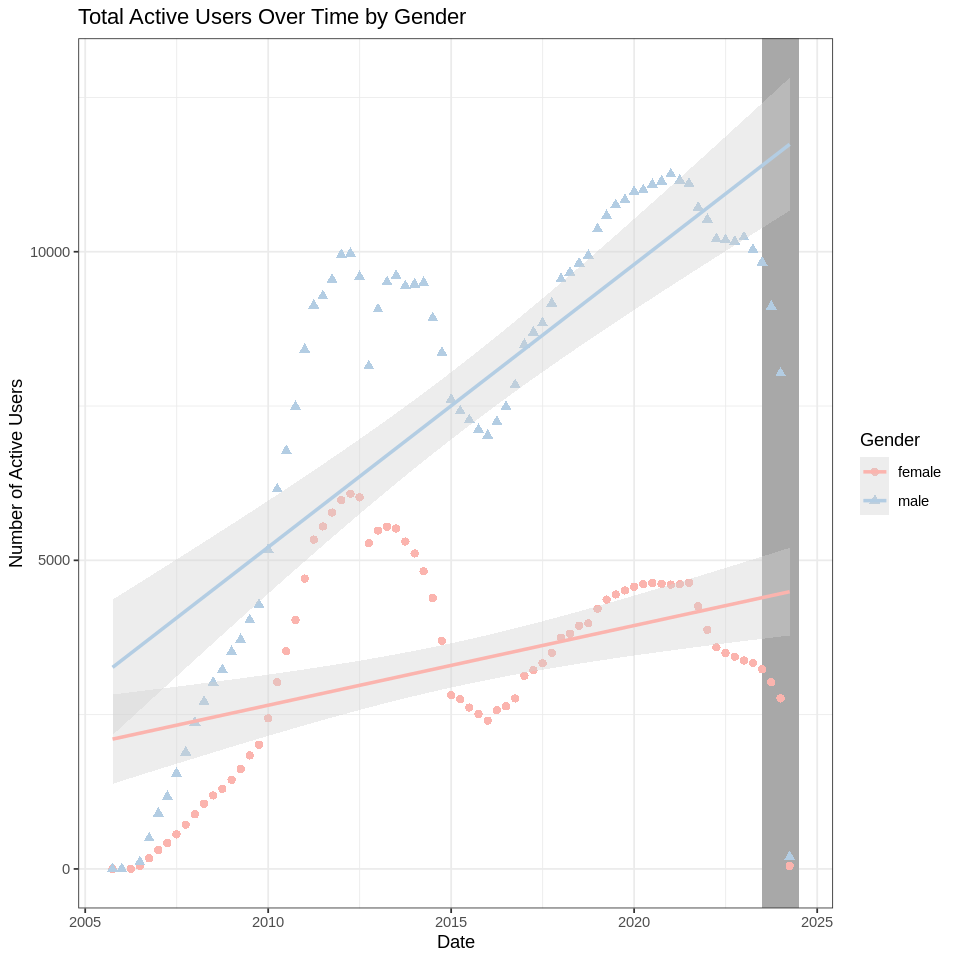

In [ ]:
library(lubridate)

dat$reg <- as.Date(dat$reg)
dat$log <- as.Date(dat$log)

registrations <- dat %>%
  mutate(date = floor_date(reg, "quarter")) %>%
  group_by(date, gender) %>%
  summarize(reg = n(), .groups = "drop")

last_logins <- dat %>%
  mutate(date = floor_date(log, "quarter")) %>%
  group_by(date, gender) %>%
  summarize(log = n(), .groups = "drop")

total <- registrations %>%
  full_join(last_logins, by = c("date", "gender")) %>%
  mutate(
    reg = ifelse(is.na(reg), 0, reg),
    log = ifelse(is.na(log), 0, log),
    net_reg = reg - log
  ) %>%
  group_by(gender) %>%
  mutate(users = cumsum(net_reg)) %>%
  filter(!is.na(date)) %>%
  filter(!is.na(gender)) %>%
  ungroup()

# plot
sca1 <- ggplot(total) +
  geom_rect(aes(xmin = as.Date("2023-07-01"),
                xmax = as.Date("2024-07-01"),
                ymin = -Inf,
                ymax = Inf),
            fill = "dark grey", alpha = 0.4) +
  geom_point(aes(x = date, y = users, color = gender, shape = gender), size = 2) +
  scale_color_brewer(palette = "Pastel1") +
  geom_smooth(fill = "light grey", alpha = 0.4, method = lm, aes(x = date, y = users, color = gender)) +
  labs(title = "Total Active Users Over Time by Gender",
       x = "Date",
       y = "Number of Active Users",
       color = "Gender",
       shape = "Gender") +
  theme_bw()
sca1

In [ ]:
head(total)

date,gender,reg,log,net_reg,users
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2005-10-01,female,1,0,1,1
2005-10-01,male,1,0,1,1
2006-01-01,male,1,0,1,2
2006-04-01,female,1,0,1,2
2006-07-01,female,58,13,45,47
2006-07-01,male,165,55,110,112


In [ ]:
total_stat <- total %>%
  ungroup() %>%
  subset(gender == "female") %>%
  select(date, users) %>%
  rename("female_users" = "users")

total_stat_male <- total %>%
  ungroup() %>%
  subset(gender == "male") %>%
  select(date, users) %>%
  rename("male_users" = "users")

total_stat <- left_join(total_stat, total_stat_male, join_by(date)) %>%
  filter(!is.na(date))

lm_female <- lm(formula = female_users ~ date, data = total_stat)
lm_male <- lm(formula = male_users ~ date, data = total_stat)

In [ ]:
summary(lm_female)
summary(lm_male)


Call:
lm(formula = female_users ~ date, data = total_stat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4443.2 -1006.4  -250.7   627.7  3135.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.513e+03  1.529e+03  -1.644 0.104617    
date         3.536e-01  9.215e-02   3.837 0.000265 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1548 on 72 degrees of freedom
Multiple R-squared:  0.1698,	Adjusted R-squared:  0.1582 
F-statistic: 14.72 on 1 and 72 DF,  p-value: 0.0002649



Call:
lm(formula = male_users ~ date, data = total_stat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11454.1  -1084.3    176.7   1204.4   3725.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.237e+04  2.353e+03  -5.258 1.47e-06 ***
date         1.212e+00  1.414e-01   8.572 1.45e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2330 on 71 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.5017 
F-statistic: 73.48 on 1 and 71 DF,  p-value: 1.454e-12


In [ ]:
setwd("/content/drive/MyDrive/AAFT_Draft")
ggsave("scatter_plot1.png", plot = sca1, width = 10, height = 10, units = "in")

`geom_smooth()` using formula = 'y ~ x'


In [ ]:
# recent active users

# users logged on for the past 1 year
activeY <- sum(tail(tmplog$log, 365))

# ... for the last month
activeM <- sum(tail(tmplog$log, 30))

# ... for the last week
activeW <- sum(tail(tmplog$log, 7))

cat(activeY, activeM, activeW)

14978 9764 8256

**Active users summary:**

Active for the past year: 14978

Active for the past month: 9764

Active for the past week: 8265


In [ ]:
# To do: use full time format to filter bots
# visualize user activity for the past year